
[INFO] Dataset Shape: (418, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB

[INFO] Summary of Numerical Features:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636  

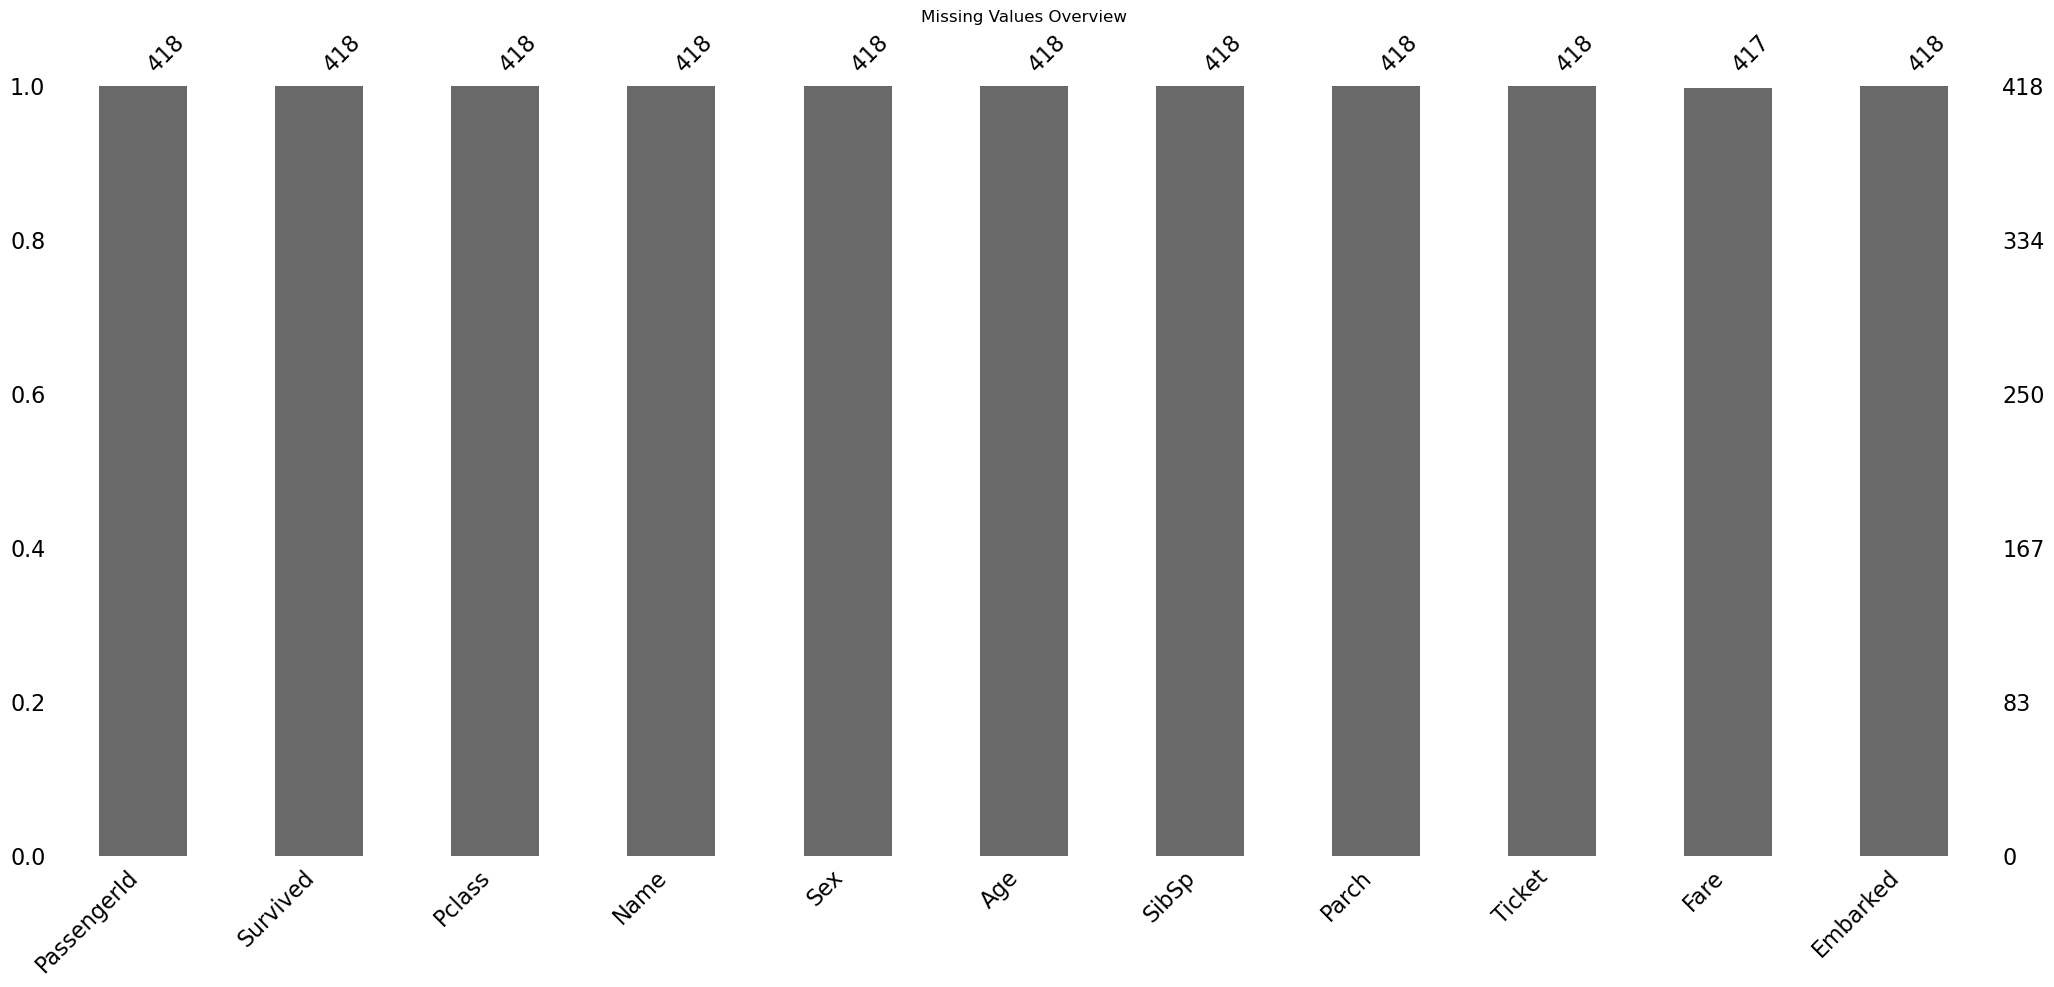

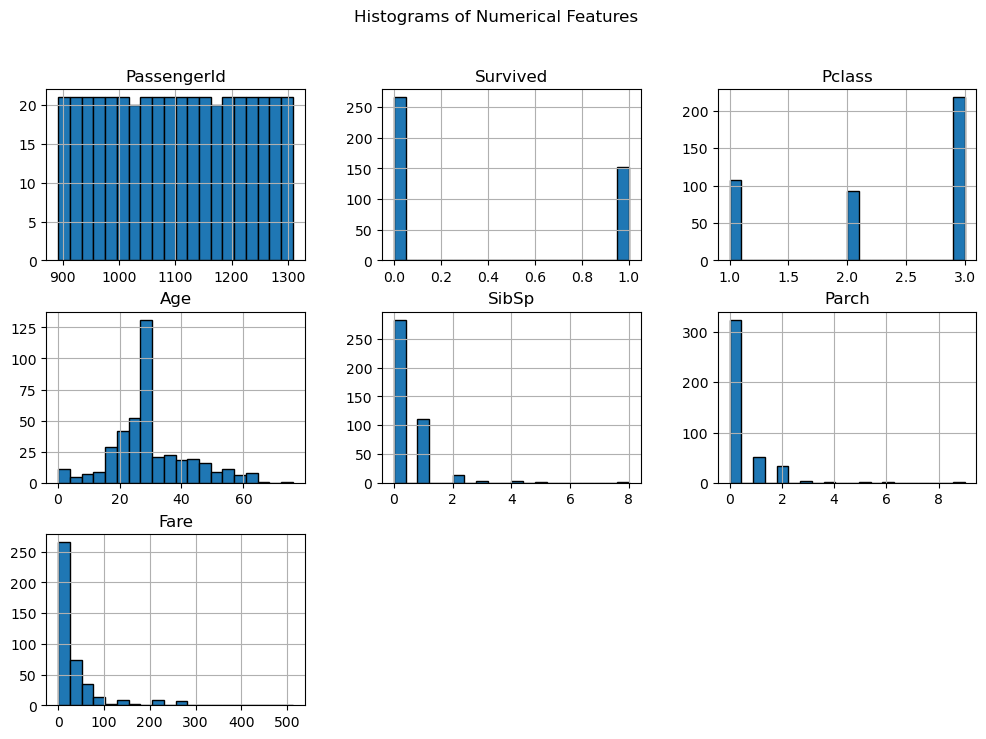

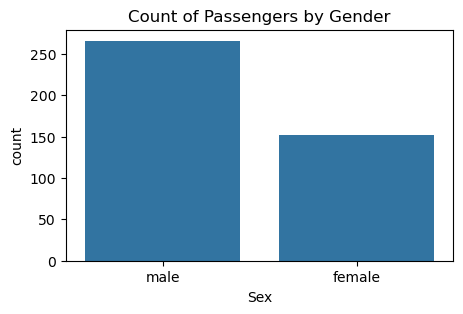

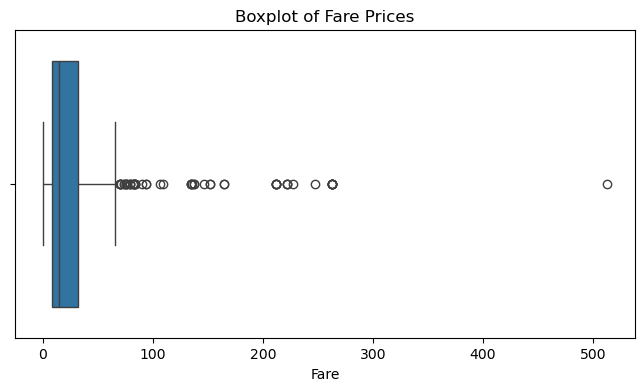


[INFO] Data Exploration Completed Successfully!


In [12]:
#pract1
# Accessanopen-sourcedataset“Titanic”.Applypre-processingtechniquesontherawdataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import os

df = pd.read_csv(r"C:\Users\Samruddhi\OneDrive\Desktop\DATASETS/tested.csv")
df.head()

print(f"\n[INFO] Dataset Shape: {df.shape}")

df.info()

print("\n[INFO] Summary of Numerical Features:")
print(df.describe())

print("\n[INFO] Missing Values Count:")
print(df.isnull().sum())

df['Age'] = df['Age'].fillna(df['Age'].mean())
print(df)

df = df.drop(['Cabin'], axis=1)

plt.figure(figsize=(10, 5))
msno.bar(df)
plt.title("Missing Values Overview")
plt.show()

df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

 #Countplot for categorical columns (e.g., Gender)
plt.figure(figsize=(5, 3))
sns.countplot(x=df['Sex'])
plt.title("Count of Passengers by Gender")

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)
corr_matrix

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare Prices")
plt.show()
print("\n[INFO] Data Exploration Completed Successfully!")

Accuracy: 0.5845
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.48      0.54      4977
           1       0.57      0.69      0.62      5023

    accuracy                           0.58     10000
   macro avg       0.59      0.58      0.58     10000
weighted avg       0.59      0.58      0.58     10000



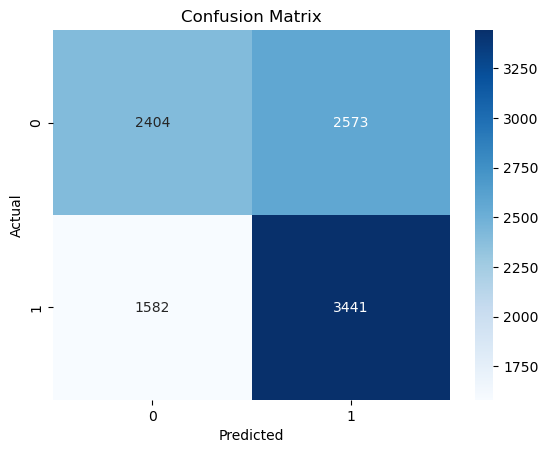

In [13]:
#pract2
# TextclassificationforSentimentalanalysisusingKNN.(ReferanydatasetlikeTitanic,Twitter,etc.)
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download stopwords if not already
# nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))

# Load dataset
df = pd.read_csv(
    r"C:\Users\Samruddhi\OneDrive\Desktop\DATASETS\training.1600000.processed.noemoticon.csv",
    encoding="ISO-8859-1",
    names=["target", "id", "date", "flag", "user", "text"]
)

# Keep only relevant columns
df = df[['text', 'target']]

# Convert sentiment labels (target: 4 → positive (1), 0 → negative (0))
df['sentiment'] = df['target'].apply(lambda x: 1 if x == 4 else 0)
df.drop('target', axis=1, inplace=True)

# Reduce dataset size for faster testing
df = df.sample(n=50000, random_state=42)

# Text preprocessing function
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)       # remove URLs
    text = re.sub(r'@\w+', '', text)                          # remove mentions
    text = re.sub(r'[^a-z\s]', '', text)                      # remove special chars and numbers
    text = re.sub(r'\s+', ' ', text)                          # normalize whitespace
    return ' '.join([word for word in text.split() if word not in stop_words])

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess_text)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])  # sparse matrix
y = df['sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN model - using default metric (minkowski) as cosine is invalid here
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#pract3
#Write a program to recognize a document is positive or negative based on polarity words using suitable classification method
import nltk
import random
import string

from nltk.corpus import movie_reviews, stopwords
from nltk import FreqDist, classify, NaiveBayesClassifier

# Download required NLTK resources
# nltk.download('movie_reviews')
# nltk.download('stopwords')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Prepare the dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

# Preprocess words: lowercase, remove stopwords and punctuation
def clean_words(words):
    return [w.lower() for w in words if w.isalpha() and w.lower() not in stop_words]

# Create frequency distribution from cleaned words
all_words = []
for doc in movie_reviews.fileids():
    words = clean_words(movie_reviews.words(doc))
    all_words.extend(words)

all_words_freq = FreqDist(all_words)

# Select top 2000 most frequent words as features
word_features = list(all_words_freq)[:2000]

# Feature extractor function
def document_features(document):
    words = set(clean_words(document))
    features = {}
    for word in word_features:
        features[f'contains({word})'] = (word in words)
    return features

# Build featuresets
featuresets = [(document_features(d), c) for (d, c) in documents]

# Split into training and test sets
train_set, test_set = featuresets[100:], featuresets[:100]

# Train classifier
classifier = NaiveBayesClassifier.train(train_set)

# Evaluate and output results
accuracy = classify.accuracy(classifier, test_set) * 100
print(f' Accuracy of Naive Bayes Classifier: {accuracy:.2f}%\n')

print('Most Informative Features:')
classifier.show_most_informative_features(10)


In [15]:
#pract4
#)Predictthenumberofringseitherasacontinuousvalueorasaclassificationproblem.b)Predicttheageofabalonefromphysicalmeasurementsusinglinearregression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

abalone=pd.read_csv(r'C:\Users\Samruddhi\OneDrive\Desktop\DATASETS/abalone.csv')
abalone.head()

abalone.shape
abalone.info()
abalone.describe()

le=LabelEncoder()
abalone['Sex']=le.fit_transform(abalone['Sex'])
y = abalone.iloc[:, 8].values
x=abalone.iloc[:,range(0,8)].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#Perform Classification to classify the rings attribute
classifier=GaussianNB()

classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracyofclassification(in%):",accuracy_score(y_test,y_pred)* 100)

#Tofindthecorrelationbetweentheattributesandthering.
abalone.corr()

# Usinglinearregressiontopredictthenumberofrings
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test)

print('TrainScore:',regressor.score(x_train,y_train))
print('TestScore:',regressor.score(x_test,y_test))
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2))
print("Explainvariancescore=",round(sm.explained_variance_score(y_test,y_pred),2))
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

abalone['age']=abalone['Rings']+1.5
abalone.head()

abalone.corr()

y=abalone.iloc[:,9].values
x=abalone.iloc[:,range(0,8)].values

x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=0)
regressor_age= LinearRegression()
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test)

print('TrainScore:',regressor.score(x_train,y_train))
print('Test Score: ', regressor.score(x_test, y_test))
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2))
print("Explainvariancescore=",round(sm.explained_variance_score(y_test,y_pred),2))
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

#Displayingthepredictedvaluesoftheagecolumn.
y_pred
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R² Score (Accuracy-like):", round(r2, 4))

print("Regression Accuracy (R² %):", round(r2 * 100, 2), "%")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
[[ 7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  8  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4 13 17  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  5 17 27  8  2  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16 33 41 13  6  3  2  0  0 

In [16]:
#pract5
#Performthek-meanclusteringwithinitialcentroidsasm1=P1=Cluster#1=C1andm2=P8=cluster#2=C2.
import numpy as np

# Data points
points = np.array([
    [0.1, 0.6], [0.15, 0.71], [0.08, 0.9], [0.16, 0.85],
    [0.2, 0.3], [0.25, 0.5], [0.24, 0.1], [0.3, 0.2]
])

# Initial centroids
centroid1 = np.array([0.1, 0.6])
centroid2 = np.array([0.3, 0.2])

# Function to compute Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

# Function to assign clusters based on distance to centroids
def assign_clusters(points, centroid1, centroid2):
    cluster1 = []
    cluster2 = []
    for point in points:
        d1 = euclidean_distance(point, centroid1)
        d2 = euclidean_distance(point, centroid2)
        if d1 < d2:
            cluster1.append(point)
        else:
            cluster2.append(point)
    return np.array(cluster1), np.array(cluster2)

# Perform one iteration
cluster1, cluster2 = assign_clusters(points, centroid1, centroid2)

# Calculate new centroids
centroid1_new = np.mean(cluster1, axis=0)
centroid2_new = np.mean(cluster2, axis=0)

# Output results
print(f"Cluster1: {cluster1}")
print(f"Cluster2: {cluster2}")
print(f"Updated Centroid 1: {centroid1_new}")
print(f"Updated Centroid 2: {centroid2_new}")

# Determine the cluster for P6
p6 = np.array([0.25, 0.5])
d1_p6 = euclidean_distance(p6, centroid1_new)
d2_p6 = euclidean_distance(p6, centroid2_new)
p6_cluster = 'C1' if d1_p6 < d2_p6 else 'C2'
print(f"P6 belongs to: {p6_cluster}")

# Population around m2
print(f"Population around m2 (Cluster2): {len(cluster2)}")


Cluster1: [[0.1  0.6 ]
 [0.15 0.71]
 [0.08 0.9 ]
 [0.16 0.85]
 [0.25 0.5 ]]
Cluster2: [[0.2  0.3 ]
 [0.24 0.1 ]
 [0.3  0.2 ]]
Updated Centroid 1: [0.148 0.712]
Updated Centroid 2: [0.24666667 0.2       ]
P6 belongs to: C1
Population around m2 (Cluster2): 3


In [8]:
#pract 5
import numpy as np

# Define the points and initial centroids
P1 = np.array([0.1, 0.6])
P2 = np.array([0.15, 0.71])
P3 = np.array([0.08, 0.9])
P4 = np.array([0.16, 0.85])
P5 = np.array([0.2, 0.3])
P6 = np.array([0.25, 0.5])
P7 = np.array([0.24, 0.1])
P8 = np.array([0.3, 0.2])

m1 = P1
m2 = P8

# Define the maximum number of iterations
max_iter = 100

# Perform k-means clustering
for i in range(max_iter):
    # Assign each point to the closest centroid
    C1 = []
    C2 = []
    for point in [P1, P2, P3, P4, P5, P6, P7, P8]:
        dist1 = np.linalg.norm(point - m1)
        dist2 = np.linalg.norm(point - m2)
        if dist1 < dist2:
            C1.append(point)
        else:
            C2.append(point)

    # Recalculate the centroids
    m1_new = np.mean(C1, axis=0)
    m2_new = np.mean(C2, axis=0)

    # Check for convergence
    if np.allclose(m1, m1_new) and np.allclose(m2, m2_new):
        break

    # Update the centroids
    m1 = m1_new
    m2 = m2_new

# Print the final clusters
print("Cluster 1:", C1)
print("Length: ", len(C1))

print("Cluster 2:", C2)
print("Length: ", len(C2))

Cluster 1: [array([0.1, 0.6]), array([0.15, 0.71]), array([0.08, 0.9 ]), array([0.16, 0.85]), array([0.25, 0.5 ])]
Length:  5
Cluster 2: [array([0.2, 0.3]), array([0.24, 0.1 ]), array([0.3, 0.2])]
Length:  3


In [1]:
# ---------------------- Import Libraries ----------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import os

# ---------------------- Load Dataset ----------------------
file_path = r"C:\Users\Samruddhi\OneDrive\Desktop\DATASETS\Tested.csv"
try:
    df = pd.read_excel(file_path, engine='xlrd')
    print("\n[INFO] Dataset Loaded Successfully!") 
except Exception as e:
    print("\n[ERROR] Failed to Load Dataset:", e)

# ---------------------- Basic Information ----------------------
print("\n[INFO] Dataset Info:")
df.info()
print(f"\n[INFO] Dataset Shape: {df.shape}")
print("\n[INFO] First 5 Rows:")
print(df.head())

# ---------------------- Summary Statistics ----------------------
print("\n[INFO] Summary of Numerical Features:")
print(df.describe())
print("\n[INFO] Summary of Categorical Features:")
print(df.describe(include=['O']))

# ---------------------- Missing Values ----------------------
print("\n[INFO] Missing Values Count:")
print(df.isnull().sum())
msno.bar(df)
plt.title("Missing Values Overview")
plt.show()

# ---------------------- Check for Duplicates ----------------------
print("\n[INFO] Duplicate Rows:", df.duplicated().sum())

# ---------------------- Data Distribution ----------------------
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

sns.countplot(x='sex', data=df)
plt.title("Count of Passengers by Gender")
plt.show()

# ---------------------- Correlation Analysis ----------------------
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# ---------------------- Outlier Detection (Before) ----------------------
sns.boxplot(x='fare', data=df)
plt.title("Boxplot of Fare Prices")
plt.show()

# ---------------------- Handle Missing Values ----------------------
threshold = 0.6
missing_ratio = df.isnull().sum() / len(df)
df.drop(columns=missing_ratio[missing_ratio > threshold].index, inplace=True)

# Fill numerical with median
for col in df.select_dtypes(include=['number']):
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Fill categorical with mode
for col in df.select_dtypes(include=['object']):
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\n[INFO] Missing Values After Handling:")
print(df.isnull().sum())

# ---------------------- Handle Categorical Data ----------------------
# Label Encode binary features
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

# One-Hot Encode multi-class
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)

# Ordinal Encoding
df['pclass'] = df['pclass'].map({1: 1, 2: 2, 3: 3})

# ---------------------- Feature Scaling ----------------------
num_features = ['age', 'fare']
minmax_scaler = MinMaxScaler()
df[num_features] = minmax_scaler.fit_transform(df[num_features])
print("\n[INFO] Feature Scaling Applied.")

# ---------------------- Outlier Removal ----------------------
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers_iqr(df, 'fare')
df = remove_outliers_iqr(df, 'age')

# ---------------------- Save Preprocessed Dataset ----------------------
save_path_csv = r"C:\Users\Shreyash Musmade\Desktop\Practical\archive\titanic_preprocessed.csv"
save_path_excel = r"C:\Users\Shreyash Musmade\Desktop\Practical\archive\titanic_preprocessed.xlsx"

try:
    df.to_csv(save_path_csv, index=False)
    df.to_excel(save_path_excel, index=False)
    print(f"\n[INFO] Dataset saved as CSV and Excel.")
except Exception as e:
    print("\n[ERROR] Failed to save dataset:", e)

# Verify saved files
if os.path.exists(save_path_csv):
    print("[INFO] CSV file verified.")
else:
    print("[ERROR] CSV file not found.")
if os.path.exists(save_path_excel):
    print("[INFO] Excel file verified.")
else:
    print("[ERROR] Excel file not found.")



[ERROR] Failed to Load Dataset: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd.

[INFO] Dataset Info:


NameError: name 'df' is not defined